In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data =  pd.read_excel(r"startup_investors_data.xlsx")
data.head()

,Startup_ID,Startup_Idea,Domain,Startup_Stage,Industry_Funder_Type,Project_Duration_Months,SDG_Alignment,Project_Status,Funding_Rounds,Investment_Amount,Valuation,Number_of_Investors,Country,Year_Founded,Growth_Rate_Cent
0,ST100000,AI-based Crop Disease Detection,Healthcare,Early Revenue,VC Firm,11,SDG 17,Funded,8,1.335166e+09,6.621448e+09,50,Germany,2012,77.10
1,ST100001,Smart Traffic Management System,Sustainability,MVP,Government Grant,32,SDG 9,Ongoing,2,2.781498e+09,8.363214e+09,36,UK,2006,105.52
2,ST100002,Carbon Footprint Tracking App,Healthcare,Idea,Angel Investor,36,SDG 9,Ongoing,10,3.309032e+09,1.548270e+10,39,Singapore,2016,190.47
3,ST100003,Smart Traffic Management System,Blockchain,Idea,Angel Investor,12,SDG 9,Funded,5,4.050196e+09,1.268253e+10,44,France,2021,9.44
4,ST100004,AI-based Crop Disease Detection,Sustainability,Idea,Angel Investor,36,SDG 17,Completed,9,1.645080e+09,6.887966e+09,48,India,2011,192.00


In [5]:
data.shape

(5000, 15)

In [7]:
null_values = data.isnull().sum().sum() # checking the data na values.
if(null_values == 0):
  print("No null values found")
else:
  print("Null values:",null_values)

No null values found


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Startup_ID               5000 non-null   object 
 1   Startup_Idea             5000 non-null   object 
 2   Domain                   5000 non-null   object 
 3   Startup_Stage            5000 non-null   object 
 4   Industry_Funder_Type     5000 non-null   object 
 5   Project_Duration_Months  5000 non-null   int64  
 6   SDG_Alignment            5000 non-null   object 
 7   Project_Status           5000 non-null   object 
 8   Funding_Rounds           5000 non-null   int64  
 9   Investment_Amount        5000 non-null   float64
 10  Valuation                5000 non-null   float64
 11  Number_of_Investors      5000 non-null   int64  
 12  Country                  5000 non-null   object 
 13  Year_Founded             5000 non-null   int64  
 14  Growth_Rate_Cent        

In [9]:
data.describe()

,Project_Duration_Months,Funding_Rounds,Investment_Amount,Valuation,Number_of_Investors,Year_Founded,Growth_Rate_Cent
count,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,21.182400,5.491600,2.455567e+09,7.971059e+09,25.542000,2011.544000,102.091732
std,8.973719,2.913353,1.423787e+09,5.479487e+09,14.271838,6.885285,56.179781
min,6.000000,1.000000,1.102610e+06,1.722547e+06,1.000000,2000.000000,5.060000
25%,13.000000,3.000000,1.221506e+09,3.598305e+09,13.000000,2006.000000,52.815000
50%,21.000000,6.000000,2.460634e+09,7.002304e+09,25.000000,2012.000000,102.215000
75%,29.000000,8.000000,3.639951e+09,1.147676e+10,38.000000,2018.000000,150.580000
max,36.000000,10.000000,4.999544e+09,2.470906e+10,50.000000,2023.000000,199.970000


In [14]:
# removing outliers.
q1 = data["Growth_Rate_Cent"].quantile(0.25)
q3 = data["Growth_Rate_Cent"].quantile(0.75)

IQR = q3 - q1
min = q1 - 1.5 * IQR
max = q3 + 1.5 * IQR
print(min)
print(max)

data = data[(data["Growth_Rate_Cent"] >= min) & (data["Growth_Rate_Cent"] <= max)]

data.shape  # data is good , no outlier detected.


-93.83250000000004
297.2275000000001


(5000, 15)

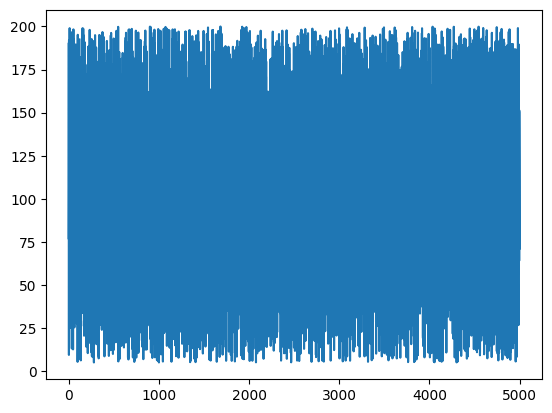

In [16]:
plt.plot(data["Growth_Rate_Cent"]) # no capping required . Data in min-max range.

In [27]:
# factoring the data
data.columns


Index(['Startup_ID', 'Startup_Idea', 'Domain', 'Startup_Stage',
       'Industry_Funder_Type', 'Project_Duration_Months', 'SDG_Alignment',
       'Project_Status', 'Funding_Rounds', 'Investment_Amount', 'Valuation',
       'Number_of_Investors', 'Country', 'Year_Founded', 'Growth_Rate_Cent'],
      dtype='object')

In [26]:
data["Domain"].value_counts()


,count
Domain,
IoT,651
Sustainability,643
Smart Cities,639
AgriTech,630
Energy,626
Blockchain,622
AI,612
Healthcare,577


In [24]:
data['Startup_Stage'].value_counts()

,count
Startup_Stage,
MVP,1312
Prototype,1266
Idea,1229
Early Revenue,1193


In [25]:
data['Industry_Funder_Type'].value_counts()


,count
Industry_Funder_Type,
Angel Investor,1298
Corporate R&D,1279
Government Grant,1212
VC Firm,1211


In [29]:
# creating the the data frame for EDA and ML
df = data.filter(["Startup_ID","Domain","Startup_Stage","Industry_Funder_Type","Investment_Amount","Valuation","Number_of_Investors","Year_Founded","Growth_Rate_Cent"])
df.head()

,Startup_ID,Domain,Startup_Stage,Industry_Funder_Type,Investment_Amount,Valuation,Number_of_Investors,Year_Founded,Growth_Rate_Cent
0,ST100000,Healthcare,Early Revenue,VC Firm,1.335166e+09,6.621448e+09,50,2012,77.10
1,ST100001,Sustainability,MVP,Government Grant,2.781498e+09,8.363214e+09,36,2006,105.52
2,ST100002,Healthcare,Idea,Angel Investor,3.309032e+09,1.548270e+10,39,2016,190.47
3,ST100003,Blockchain,Idea,Angel Investor,4.050196e+09,1.268253e+10,44,2021,9.44
4,ST100004,Sustainability,Idea,Angel Investor,1.645080e+09,6.887966e+09,48,2011,192.00


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Startup_ID            5000 non-null   object 
 1   Domain                5000 non-null   object 
 2   Startup_Stage         5000 non-null   object 
 3   Industry_Funder_Type  5000 non-null   object 
 4   Investment_Amount     5000 non-null   float64
 5   Valuation             5000 non-null   float64
 6   Number_of_Investors   5000 non-null   int64  
 7   Year_Founded          5000 non-null   int64  
 8   Growth_Rate_Cent      5000 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 351.7+ KB


In [31]:
# save the file for model training.
df.to_csv('ready_data.csv', index=False)